In [1]:
from scipy.sparse import diags #linalg
from scipy.linalg import solve
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def solver(T,dt):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    E = np.zeros((M+1,N+1))
    S = np.zeros((M+1,N+1))
    C = np.zeros((M+1,N+1))
    Em = np.zeros((M+1,N+1))
    Ei = np.zeros((M+1,N+1))
    Em_lag = np.zeros((M+1,N+1))
    
    
    #initial conditions
    S[0,0] = 1
    C[0,0] = 0
    Em[0,0] = p*h*rho2*S[0,0]
    Ei[0,0] = rho1*C[0,0]
   
    #lagrangian Step
    Em_lag[0:10,0] = Em[0,0]
    
    #special time step at n=0  
    E[:,1] = Em_lag[:,0] + Ei[:,0]
    S[:,1] = E[:,1] / (p*h*rho2+rho1)
    C[:,1] = S[:,1]
    Ei[:,1] = rho1*C[:,1]
    Em[:,1] = p*h*rho2*S[:,1]
    S[0,1] = 1
    
    for n in range(1,N):
        Em_lag[0:10,n] = Em[0,0]
        Em_lag[10:M+1,n] = Em[1:M-8,n]+((dt-9*dx)/dx)*(Em[0:M-9,n]-Em[1:M-8,n])
        E[:,n+1] = Em_lag[:,n] + Ei[:,n]
        S[:,n+1] = E[:,n+1] / (p*h*rho2+rho1)
        C[:,n+1] = S[:,n+1]
        Ei[:,n+1] = rho1*C[:,n+1]
        Em[:,n+1] = p*h*rho2*S[:,n+1]
        S[0,n+1] = 1
        
    return   S, x, t


In [3]:
from scipy.integrate import quad
#Solving for matrices L1, L2, L3
T = 1800
L = 4000
wd = 10         #width
h = 2           #height
fv = 1         #flow velocity
sg = 1          #specific gravity
den = 1000         #density of CIMW and CMW
p = 2*h+wd      #wetted perimeter
theta = 1       #porosity
l = 10          #element distance
Q = 20          #flow rate
K = 0          #dispersion coefficient K=diffusion+dispersitivity*fv
A = 20          #Area
dt = 90         #time step size
dx = 10
rho1 = p*h*den*theta
rho2 = den
N = int(round(T/dt))          #no. of time steps
M = int(round(L/dx))          #no. of nodes

(S,x,t) = solver(T,dt)

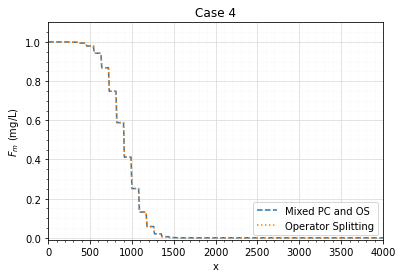

In [4]:
fig, ax = plt.subplots()
ax.axis([-0.1,L+0.1,-0.01,1.1]) 
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()

plt.plot(x,S[:,N], "--")
plt.plot(x,S[:,N], ":")
plt.legend(["Mixed PC and OS", "Operator Splitting"], loc ="lower right")
plt.xlabel("x")
plt.ylabel("$F_m$ (mg/L)")
plt.title("Case 4")
plt.savefig('Example 2 Case 4.png')

plt.show()